In [ ]:
!pip install kaggle

In [2]:
!pip install tensorflowjs

In [ ]:
# Create .kaggle directory and upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nirmalsankalana/rice-leaf-disease-image

Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/rice-leaf-disease-image
License(s): CC0-1.0
rice-leaf-disease-image.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip /content/rice-leaf-disease-image.zip -d /kaggle/input/rice-leaf-disease-image

In [4]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import numpy as np
import pickle
from google.colab import files
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

In [ ]:
source_path = '/kaggle/input/rice-leaf-disease-image'
source_path_Bacterialblight = os.path.join(source_path, 'Bacterialblight')
source_path_Blast = os.path.join(source_path, 'Blast')
source_path_Brownspot = os.path.join(source_path, 'Brownspot')
source_path_Tungro = os.path.join(source_path, 'Tungro')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_Bacterialblight))} images of Bacterialblight.")
print(f"There are {len(os.listdir(source_path_Blast))} images of Blast.")
print(f"There are {len(os.listdir(source_path_Brownspot))} images of Brownspot.")
print(f"There are {len(os.listdir(source_path_Tungro))} images of Tungro.")

There are 1584 images of Bacterialblight.
There are 1440 images of Blast.
There are 1600 images of Brownspot.
There are 1308 images of Tungro.


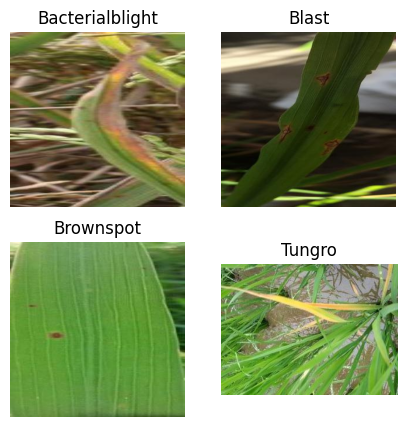

In [ ]:
# Fungsi untuk menampilkan satu gambar dari setiap kelas
def show_sample_image(image_dir, class_name):
    image_path = os.path.join(image_dir, os.listdir(image_dir)[0])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

# Menampilkan satu gambar dari setiap kelas
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
show_sample_image(source_path_Bacterialblight, 'Bacterialblight')

plt.subplot(2, 2, 2)
show_sample_image(source_path_Blast, 'Blast')

plt.subplot(2, 2, 3)
show_sample_image(source_path_Brownspot, 'Brownspot')

plt.subplot(2, 2, 4)
show_sample_image(source_path_Tungro, 'Tungro')

plt.show()

In [ ]:
root_dir = '/kaggle/working/RLDI'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path, 'training/Bacterialblight'))
    os.makedirs(os.path.join(root_path, 'training/Blast'))
    os.makedirs(os.path.join(root_path, 'training/Brownspot'))
    os.makedirs(os.path.join(root_path, 'training/Tungro'))
    os.makedirs(os.path.join(root_path, 'validation/Bacterialblight'))
    os.makedirs(os.path.join(root_path, 'validation/Blast'))
    os.makedirs(os.path.join(root_path, 'validation/Brownspot'))
    os.makedirs(os.path.join(root_path, 'validation/Tungro'))
    os.makedirs(os.path.join(root_path, 'test'))


try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/kaggle/working/RLDI/test
/kaggle/working/RLDI/validation
/kaggle/working/RLDI/training
/kaggle/working/RLDI/validation/Bacterialblight
/kaggle/working/RLDI/validation/Brownspot
/kaggle/working/RLDI/validation/Blast
/kaggle/working/RLDI/validation/Tungro
/kaggle/working/RLDI/training/Bacterialblight
/kaggle/working/RLDI/training/Brownspot
/kaggle/working/RLDI/training/Blast
/kaggle/working/RLDI/training/Tungro


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, SPLIT_SIZE):
    source_files = os.listdir(SOURCE_DIR)
    random.shuffle(source_files)

    num_images = len(source_files)
    num_training = int(num_images * SPLIT_SIZE[0])
    num_validation = int(num_images * SPLIT_SIZE[1])

    training_images = source_files[:num_training]
    validation_images = source_files[num_training:num_training+num_validation]
    test_images = source_files[num_training+num_validation:]

    for image_name in training_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, image_name),
                        os.path.join(TRAINING_DIR, image_name))

    for image_name in validation_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, image_name),
                        os.path.join(VALIDATION_DIR, image_name))

    for image_name in test_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, image_name),
                        os.path.join(TEST_DIR, image_name))

In [ ]:
Bacterialblight_SOURCE_DIR = "/kaggle/input/rice-leaf-disease-image/Bacterialblight"
Blast_SOURCE_DIR = "/kaggle/input/rice-leaf-disease-image/Blast"
Brownspot_SOURCE_DIR = "/kaggle/input/rice-leaf-disease-image/Brownspot"
Tungro_SOURCE_DIR = "/kaggle/input/rice-leaf-disease-image/Tungro"

TRAINING_DIR = "/kaggle/working/RLDI/training"
VALIDATION_DIR = "/kaggle/working/RLDI/validation"
TEST_DIR = "/kaggle/working/RLDI/test"


TRAINING_Bacterialblight_DIR = os.path.join(TRAINING_DIR, "Bacterialblight/")
VALIDATION_Bacterialblight_DIR = os.path.join(VALIDATION_DIR, "Bacterialblight/")

TRAINING_Blast_DIR = os.path.join(TRAINING_DIR, "Blast/")
VALIDATION_Blast_DIR = os.path.join(VALIDATION_DIR, "Blast/")

TRAINING_Brownspot_DIR = os.path.join(TRAINING_DIR, "Brownspot/")
VALIDATION_Brownspot_DIR = os.path.join(VALIDATION_DIR, "Brownspot/")


TRAINING_Tungro_DIR = os.path.join(TRAINING_DIR, "Tungro/")
VALIDATION_Tungro_DIR = os.path.join(VALIDATION_DIR, "Tungro/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_Bacterialblight_DIR)) > 0:
  for file in os.scandir(TRAINING_Bacterialblight_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Blast_DIR)) > 0:
  for file in os.scandir(TRAINING_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Brownspot_DIR)) > 0:
  for file in os.scandir(TRAINING_Brownspot_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Tungro_DIR)) > 0:
  for file in os.scandir(TRAINING_Tungro_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_Bacterialblight_DIR)) > 0:
  for file in os.scandir(VALIDATION_Bacterialblight_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Blast_DIR)) > 0:
  for file in os.scandir(VALIDATION_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Blast_DIR)) > 0:
  for file in os.scandir(VALIDATION_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Tungro_DIR)) > 0:
  for file in os.scandir(VALIDATION_Tungro_DIR):
    os.remove(file.path)


# Split data untuk setiap kelas
split_data(Bacterialblight_SOURCE_DIR, TRAINING_Bacterialblight_DIR, VALIDATION_Bacterialblight_DIR, TEST_DIR, [0.7, 0.15])
split_data(Blast_SOURCE_DIR , TRAINING_Blast_DIR, VALIDATION_Blast_DIR, TEST_DIR, [0.85, 0.1])
split_data(Brownspot_SOURCE_DIR,TRAINING_Brownspot_DIR, VALIDATION_Brownspot_DIR, TEST_DIR, [0.85, 0.1])
split_data(Tungro_SOURCE_DIR, TRAINING_Tungro_DIR,VALIDATION_Tungro_DIR, TEST_DIR, [0.85, 0.1])

print(f"\n\nOriginal Bacterialblight's directory has {len(os.listdir(Bacterialblight_SOURCE_DIR))} images")
print(f"Original Blast's directory has {len(os.listdir(Blast_SOURCE_DIR))} images")
print(f"Original Brownspot's directory has {len(os.listdir(Brownspot_SOURCE_DIR))} images")
print(f"Original Tungro's directory has {len(os.listdir(Tungro_SOURCE_DIR))} images")

# Menampilkan jumlah data di setiap direktori
print(f"\nThere are {len(os.listdir(TRAINING_Bacterialblight_DIR))} images of Bacterialblight for training")
print(f"There are {len(os.listdir(TRAINING_Blast_DIR))} images of Blast for training")
print(f"There are {len(os.listdir(TRAINING_Brownspot_DIR))} images of Brownspot for training")
print(f"There are {len(os.listdir(TRAINING_Tungro_DIR))} images of Tungro for training")

print(f"\nThere are {len(os.listdir(VALIDATION_Bacterialblight_DIR))} images of Bacterialblight for validation")
print(f"There are {len(os.listdir(VALIDATION_Blast_DIR))} images of Blast for validation")
print(f"There are {len(os.listdir(VALIDATION_Brownspot_DIR))} images of Brownspot for validation")
print(f"There are {len(os.listdir(VALIDATION_Tungro_DIR))} images of Tungro for validation")

print(f"\nThere are {len(os.listdir(TEST_DIR))} images in the test directory")



Original Bacterialblight's directory has 1584 images
Original Blast's directory has 1440 images
Original Brownspot's directory has 1600 images
Original Tungro's directory has 1308 images

There are 1108 images of Bacterialblight for training
There are 1224 images of Blast for training
There are 1360 images of Brownspot for training
There are 1111 images of Tungro for training

There are 237 images of Bacterialblight for validation
There are 144 images of Blast for validation
There are 160 images of Brownspot for validation
There are 130 images of Tungro for validation

There are 458 images in the test directory


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1/255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 4803 images belonging to 4 classes.
Found 671 images belonging to 4 classes.


In [ ]:
# Load pre-trained MobileNetV2 model and exclude the top layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

In [ ]:
# Add custom layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.7039 - loss: 0.7741 - val_accuracy: 0.9613 - val_loss: 0.1297
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9362 - loss: 0.1756 - val_accuracy: 0.9851 - val_loss: 0.0544
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9673 - loss: 0.1011 - val_accuracy: 0.9940 - val_loss: 0.0383
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9815 - loss: 0.0635 - val_accuracy: 1.0000 - val_loss: 0.0184
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9870 - loss: 0.0449 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9880 - loss: 0.0418 - val_accuracy: 0.9985 - val_loss: 0.0089
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9876 - loss: 0.0373 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.9954 - loss: 0.0211 - val_accuracy: 1.000

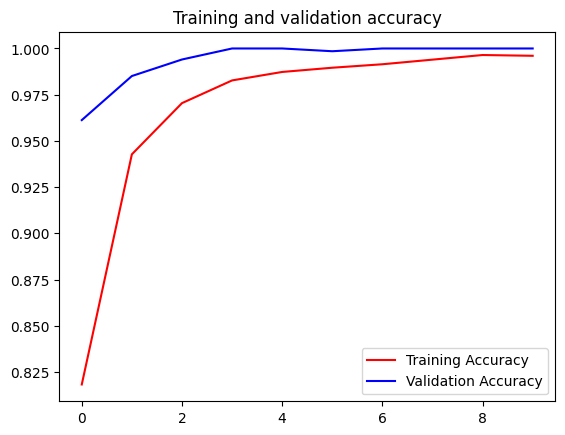

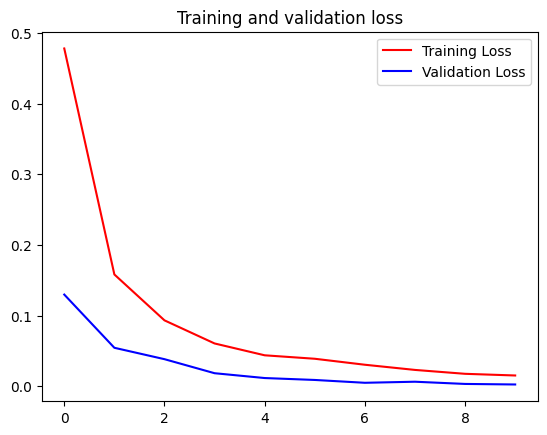

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Simpan history pelatihan
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Unduh file history
files.download('history.pkl')

# Simpan model
model.save('my_model.h5')

# Unduh model
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the Keras model
model = load_model('my_model.h5')

# Convert the Keras model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Download the TensorFlow Lite model
from google.colab import files
files.download('model.tflite')


In [7]:
# Load the Keras model from the HDF5 file
model = tf.keras.models.load_model('my_model.h5')

# Convert and save the model to TensorFlow.js format
tfjs_target_dir = 'tfjs_model'
tfjs.converters.save_keras_model(model, tfjs_target_dir)

# Zip the TensorFlow.js model directory for download
import shutil
shutil.make_archive(tfjs_target_dir, 'zip', tfjs_target_dir)


failed to lookup keras version from the file,
    this is likely a weight only file


'/content/tfjs_model.zip'

In [ ]:
# Memuat model yang telah dilatih
model = tf.keras.models.load_model('/content/my_model.h5')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction

# Path gambar yang diunggah
uploaded_image_path = '/kaggle/working/RLDI/test/BACTERAILBLIGHT3_002.jpg'  # Ganti dengan path gambar yang diunggah

# Menampilkan gambar
img = image.load_img(uploaded_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Melakukan prediksi
prediction = predict_image(model, uploaded_image_path)

# klasifikasi kategorikal dengan 4 kelas
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
predicted_class = np.argmax(prediction[0])
print(f"Prediksi: {class_names[predicted_class]}")


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# import numpy as np
# from google.colab import files
# import matplotlib.pyplot as plt

# # Memuat model yang telah dilatih
# model = tf.keras.models.load_model('/content/my_model.h5')

# def preprocess_image(img_path):
#     img = image.load_img(img_path, target_size=(224, 224))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0
#     return img_array

# def predict_image(model, img_path):
#     img_array = preprocess_image(img_path)
#     prediction = model.predict(img_array)
#     return prediction

# # Mengunggah gambar
# uploaded = files.upload()

# for file_name in uploaded.keys():
#     img_path = file_name

#     # Menampilkan gambar yang diunggah
#     img = image.load_img(img_path)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()

#     # Melakukan prediksi
#     prediction = predict_image(model, img_path)

#     # Misalkan model Anda adalah categorical classifier dengan 4 kelas
#     class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
#     predicted_class = np.argmax(prediction[0])
#     print(f"Prediksi: {class_names[predicted_class]}")
